In [73]:
#Description: this program analysis Dogecoin analysis 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import plotly.graph_objects as go
import yfinance  as yf
plt.style.use('fivethirtyeight')

In [89]:
df=yf.Ticker('DOGE-USD').history(start='2019-12-09',end='2022-02-03')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-12-08,0.002230,0.002341,0.002207,0.002238,55442239,0,0
2019-12-09,0.002237,0.002251,0.002198,0.002208,62696753,0,0
2019-12-10,0.002208,0.002222,0.002185,0.002204,69802464,0,0
2019-12-11,0.002202,0.002240,0.002181,0.002185,64108062,0,0
2019-12-12,0.002185,0.002198,0.002167,0.002188,66238690,0,0
...,...,...,...,...,...,...,...
2022-01-29,0.141649,0.143984,0.141480,0.143056,397610776,0,0
2022-01-30,0.143057,0.143515,0.138754,0.139471,363976741,0,0
2022-01-31,0.139469,0.142264,0.136853,0.141805,412307174,0,0


In [90]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,788.000000,788.000000,788.000000,788.000000,7.880000e+02,788.0,788.0
mean,0.102474,0.109274,0.095832,0.102668,2.026147e+09,0.0,0.0
std,0.131573,0.142495,0.120868,0.131630,5.127105e+09,0.0,0.0
min,0.001540,0.001612,0.001247,0.001537,2.275453e+07,0.0,0.0
25%,0.002592,0.002627,0.002557,0.002594,1.081687e+08,0.0,0.0
50%,0.008114,0.008708,0.007322,0.008211,2.861755e+08,0.0,0.0
75%,0.207166,0.218558,0.198968,0.207171,1.772632e+09,0.0,0.0
max,0.687801,0.737567,0.608168,0.684777,6.941068e+10,0.0,0.0


In [91]:
#Show the candlesticks on a chart
fig = go.Figure(data=[go.Candlestick(
    x=df.index,
    open=df['Open'],
    close = df['Close'],
    high = df['High'],
    low = df['Low'],
    increasing_line_color ='green',
    decreasing_line_color ='red'
)])
fig.show()

In [92]:
#Calculate the Fibonacci Retracement Levels
maximum_price = df['Close'].max()
minimum_price = df['Close'].min()
difference = maximum_price - minimum_price
first_level = maximum_price - difference * 0.236
second_level = maximum_price - difference * 0.382
third_level = maximum_price - difference * 0.5
fourth_level = maximum_price - difference * 0.618

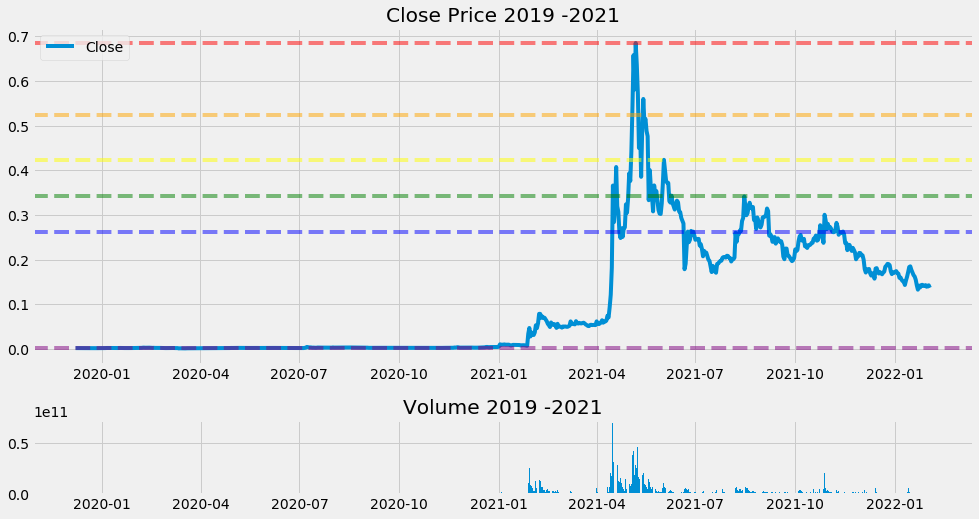

In [93]:
#Plot the Fibonacci Retracement Level with Close price and plot the volume
top = plt.subplot2grid( (4,4),(0,0),rowspan=3, colspan=4)
top.plot(np.array(df.index), np.array(df['Close']),label = 'Close')
top.axhline(maximum_price,linestyle='--',alpha=0.5,color='red')
top.axhline(first_level,linestyle='--',alpha=0.5,color ='orange')
top.axhline(second_level,linestyle='--',alpha=0.5,color ='yellow')
top.axhline(third_level,linestyle='--',alpha=0.5,color ='green')
top.axhline(fourth_level,linestyle='--',alpha=0.5,color ='blue')
top.axhline(minimum_price,linestyle='--',alpha=0.5,color ='purple')
plt.title('Close Price 2019 -2021')
plt.legend(loc='upper left')
#Plot the Volume
bottom = plt.subplot2grid((4,4),(3,0),rowspan=1,colspan=4)
plt.title('Volume 2019 -2021')
bottom.bar(np.array(df.index),np.array(df['Volume']))
plt.subplots_adjust(hspace=0.75)
plt.gcf().set_size_inches(15,8)

In [94]:
#Calculate  the daily simple returns
DSR = df['Close'].pct_change(1)
DSR

Date
2019-12-08         NaN
2019-12-09   -0.013405
2019-12-10   -0.001812
2019-12-11   -0.008621
2019-12-12    0.001373
                ...   
2022-01-29    0.009883
2022-01-30   -0.025060
2022-01-31    0.016735
2022-02-01    0.005825
2022-02-02   -0.037832
Name: Close, Length: 788, dtype: float64

In [95]:
# Get some Statistics on the daily simple return
DSR.describe()

count    787.000000
mean       0.011295
std        0.155007
min       -0.402570
25%       -0.024068
50%       -0.000374
75%        0.020368
max        3.555466
Name: Close, dtype: float64

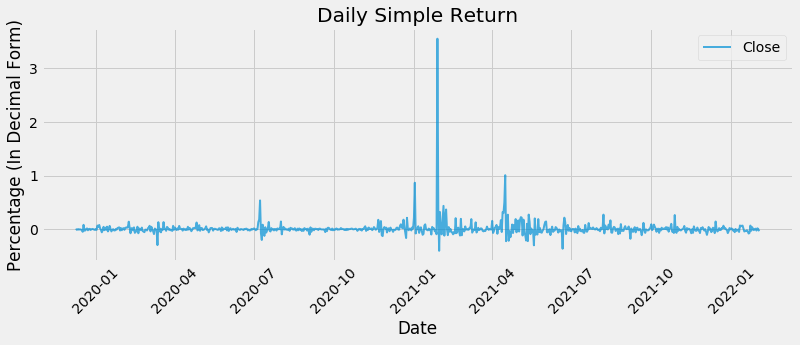

In [108]:
#Show  the DSR
plt.figure(figsize=(12,4))
plt.plot(np.array(DSR.index),DSR,label='Close',lw=2,alpha=0.7)
plt.title('Daily Simple Return')
plt.ylabel('Percentage (In Decimal Form)')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [128]:
#Calculate the RSI(Relative  strength index) it is a momenterm indicator over bought or over sold
Delta = df['Close'].diff(1)
Delta = Delta.dropna()
up = Delta.copy()
down = Delta.copy()
up[up<0]=0
down[down>0]=0
time_period = 14
AVG_Gain = up.rolling(window=time_period).mean()
AVG_Loss = abs(down.rolling(window=time_period).mean())
RS = AVG_Gain / AVG_Loss
RSI = 100.0 -(100.0/(1.0+ RS))

In [131]:
SMA30=df['Close'].rolling(window=30).mean()
df['SMA']= SMA30
SMA30

Date
2019-12-08         NaN
2019-12-09         NaN
2019-12-10         NaN
2019-12-11         NaN
2019-12-12         NaN
                ...   
2022-01-29    0.157765
2022-01-30    0.156731
2022-01-31    0.155690
2022-02-01    0.154631
2022-02-02    0.153536
Name: Close, Length: 788, dtype: float64

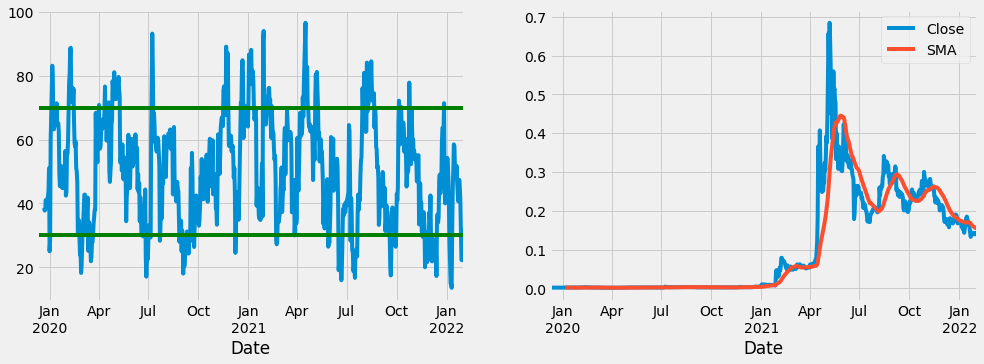

In [130]:
#Visually show the RSI and the SMA
fig, ax = plt.subplots(1,2, figsize = (15,5))
ax0 =RSI.plot(ax=ax[0])
ax0.axhline(30,color='green')
ax0.axhline(70,color='green')
df[['Close','SMA']].plot(ax=ax[1])
plt.show()